Praktikum Machine Learning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/praktikumML/praktikum03"

In [ ]:
import pandas as pd

df = pd.read_csv(path + "/data/socr.csv")
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


In [ ]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


Pra proses data

In [ ]:
df1 = (
    df[["Height(Inches)", "Weight(Pounds)"]]
    .rename(columns={
        "Height(Inches)": "tinggi_cm" ,
        "Weight(Pounds)": "berat_kg"
    })
    .assign(tinggi_cm=lambda d: d["tinggi_cm"] * 2.54,
            berat_kg=lambda d: d["berat_kg"] * 0.45359237
            )
    .round({"tinggi_cm": 2, "berat_kg":2})
).copy()

df1.head()

,tinggi_cm,berat_kg
0,167.09,51.25
1,181.65,61.91
2,176.27,69.41
3,173.27,64.56
4,172.18,65.45


Pembagian Data

In [ ]:
from sklearn.model_selection import train_test_split

# Variable independent/bebas/fitur : tinggi badan
X = df1[["tinggi_cm"]]
# Variable dependen/terikat/target : berat badan
y = df1[["berat_kg"]]

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7
    )
print ('Jumlah data training ' , len(x_train))
print ('Jumlah data testing ' , len(x_test))

Jumlah data training  20000
Jumlah data testing  5000


Pemodelan : Training dan Testing data

In [ ]:
from sklearn.linear_model import LinearRegression

# buat objek instan dari class LinearRegression
model = LinearRegression()

# Jalankan training
model.fit(x_train, y_train)

LinearRegression()

Evaluasi Model

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# prediksi dengan data testing
y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)

print("koefisien (kg per cm): ", model.coef_[0])
print("intersep (kg):         ", model.intercept_)
print("R^2:                   ", r2)
print("MAE:                   ", mean_absolute_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE (kg):             ", rmse)

koefisien (kg per cm):  [0.55182326]
intersep (kg):          [-37.65708878]
R^2:                    0.24989263013277574
MAE:                    3.6704107898943548
RMSE (kg):              4.609006140308042


Cetak Persamaan Regresinya

In [ ]:
slope = model.coef_[0][0]
intercept = model.intercept_[0]
print(f"Persamaan: y = {slope:.3f} * x + ({intercept:.3f})")

Persamaan: y = 0.552 * x + (-37.657)


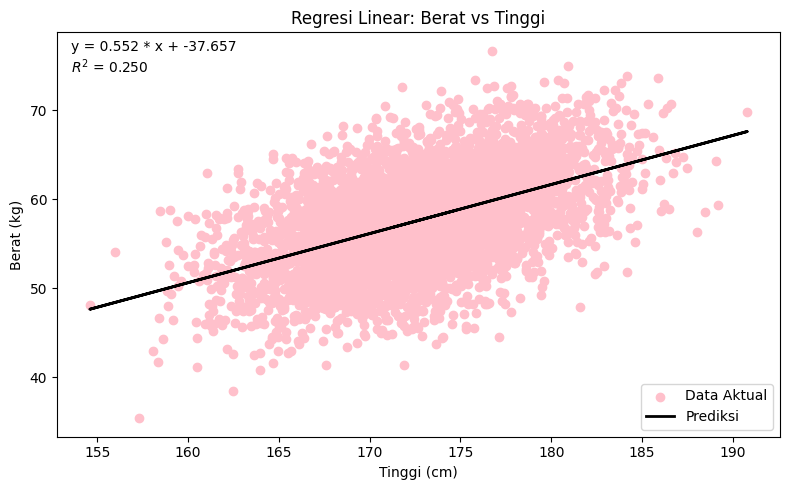

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(x_test, y_test, color="pink", label="Data Aktual")
plt.plot(x_test, y_pred, color="black", linewidth=2, label="Prediksi")
plt.xlabel("Tinggi (cm)")
plt.ylabel("Berat (kg)")
plt.title("Regresi Linear: Berat vs Tinggi")
plt.text(
    0.02, 0.98,
    f"y = {slope:.3f} * x + {intercept:.3f}\n$R^2$ = {r2:.3f}",
    transform=plt.gca() .transAxes, va="top"
)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
data_baru = pd.read_csv (path + "/data/berat_kelas_mlsiang.csv", sep=';')
y_pred_baru = model.predict(data_baru[['tinggi_cm']])
data_baru["prediksi_kg"] = y_pred_baru
data_baru['Selisih error (kg)']=data_baru['prediksi_kg'] - data_baru['berat_actual']
denom = data_baru["berat_actual"].replace(0, np.nan)
data_baru["Akurasi (%)"] = (1 - (data_baru["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100
data_baru

,No,Nama,tinggi_cm,berat_actual,prediksi_kg,Selisih error (kg),Akurasi (%)
0,1,Muflih,153,43.5,46.771870,3.271870,92.478459
1,2,Anis,157,46.5,48.979163,2.479163,94.668466
2,3,Autumn,170,75.2,56.152866,-19.047134,74.671364
3,4,Hasna,150,48.9,45.116400,-3.783600,92.262578
4,5,Azis,163,52.6,52.290103,-0.309897,99.410842
